![](ba2.png)

In [4]:
# https://theautomatic.net/2019/05/24/3-ways-to-scrape-tables-from-pdfs-with-python/
# https://camelot-py.readthedocs.io/en/master/user/install-deps.html#install-deps
import camelot 

file = "https://www.mwra.com/biobot/MWRAData20220212-data.pdf"

tables = camelot.read_pdf(file, pages = "1-end")

In [5]:
import pandas as pd

In [6]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

frames=[]
for i in range(0,len(tables)):
    frames.append(tables[i].df)
    

In [7]:
headers=frames[0].iloc[0]
headers

0                               Sample Date
1                    Southern \n(copies/mL)
2                    Northern \n(copies/mL)
3                      Southern \n7 day avg
4                      Northern \n7 day avg
5      Southern \nLow Confidence \nInterval
6     Southern \nHigh Confidence \nInterval
7      Northern \nLow Confidence \nInterval
8     Northern \nHigh Confidence \nInterval
9                Southern \nVariant Results
10             Northern \nVariant \nResults
Name: 0, dtype: object

In [8]:
df = pd.concat(frames)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,Sample Date,Southern \n(copies/mL),Northern \n(copies/mL),Southern \n7 day avg,Northern \n7 day avg,Southern \nLow Confidence \nInterval,Southern \nHigh Confidence \nInterval,Northern \nLow Confidence \nInterval,Northern \nHigh Confidence \nInterval,Southern \nVariant Results,Northern \nVariant \nResults
1,3/1/2020,,,,,,,,,,
2,3/2/2020,,,,,,,,,,
3,3/3/2020,,,,,,,,,,
4,3/4/2020,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
32,3/15/2022,,,,,,,,,,
33,3/16/2022,,,,,,,,,,
34,3/17/2022,,,,,,,,,,
35,3/18/2022,,,,,,,,,,


In [10]:
#new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
#df.columns = new_header #set the header row as the df header
df.columns = ['Date','Southern','Northern','Southern_7','Northern_7','Southern_low','Southern_high','Northern_low','Northern_high','Southern_variant','Northern_variant']

In [34]:

region = 'Southern'
dates=df['Date'].to_numpy()
counts=df[region].to_numpy()



length = len(dates)
tail_length=100

dates_end=dates[(length-tail_length):]
counts_end=counts[(length-tail_length):]

dates_initial=dates[:tail_length]
counts_initial=counts[:tail_length]

In [35]:
#https://stackoverflow.com/questions/9627686/plotting-dates-on-the-x-axis-with-pythons-matplotlib

import matplotlib.pyplot as plt
import datetime as dt

#x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in dates]
x=[]
y=[]
for i in range(0,len(dates)):
    this_date = dates[i]
    this_count = counts[i]
    if (len(this_count)>0) and (len(this_count.split(" "))==1):
        if (len(this_date.split(" "))==1):
            d = dt.datetime.strptime(this_date,'%m/%d/%Y').date()
            x.append(d)
            y.append(int(this_count))



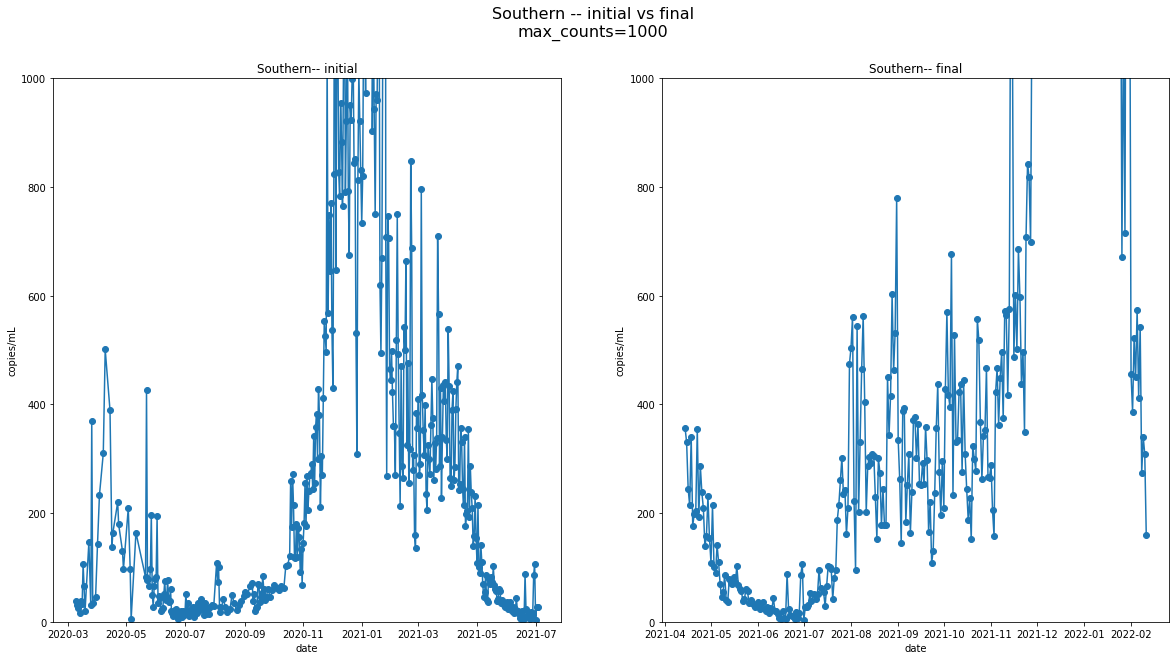

In [36]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=2))

max_counts = 1000
head=400
tail=300

# plot intial
plt.subplot(1, 2, 1)
plt.plot(x[0:head],y[0:head],'-o')
plt.ylim([0,max_counts])
plt.ylabel('copies/mL')
plt.xlabel('date')
plt.title(region + '-- initial')

# plot final
plt.subplot(1, 2, 2)

plt.plot(x[(len(x)-tail):],y[(len(x)-tail):],'-o')
plt.ylim([0,max_counts])
plt.ylabel('copies/mL')
plt.xlabel('date')
plt.title(region + '-- final')

fig = plt.gcf()
fig.set_size_inches(20, 10)
fig.suptitle(region +' -- initial vs final\nmax_counts='+str(max_counts), fontsize=16)

filename=region+'_limit_'+str(max_counts)+'.pdf'
plt.savefig(filename)
plt.show()

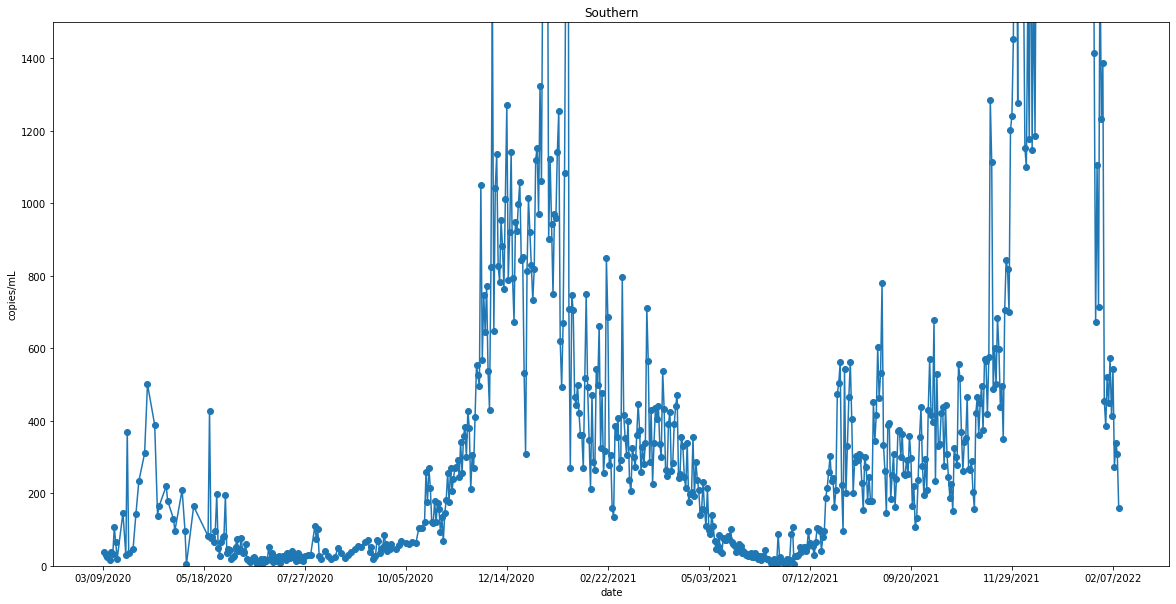

In [37]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1500
head=400
tail=300

# plot intial
#plt.subplot(1, 2, 1)
plt.plot(x,y,'-o')
plt.ylim([0,max_counts])
plt.ylabel('copies/mL')
plt.xlabel('date')
plt.title(region)

fig = plt.gcf()
fig.set_size_inches(20, 10)
#fig.suptitle(region +' -- initial vs final\nmax_counts='+str(max_counts), fontsize=16)

filename=region+'_full_limit_'+str(max_counts)+'.pdf'
plt.savefig(filename)
plt.show()